In [93]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *

import nltk
import pickle

In [75]:
df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
df_without.shape, 

((611511, 2),)

In [3]:
# Unique value

df_without['주가변동'].nunique()

2

In [4]:
# Unique value
df_without['뉴스제목'].nunique(), df_without['주가변동'].nunique()

(563319, 2)

In [76]:
# Remove Duplicates
df_without.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 : ',len(df_without))

총 샘플의 수 :  563320


In [77]:
# NULL값 유무
print(df_without.isnull().values.any())


True


In [78]:
# Remove Null rows
df_without = df_without.dropna(how='any',axis=0)
print(df_without.isnull().values.any())

False


In [8]:
# after removing Null and Duplicates

df_without.shape

(563319, 2)

In [9]:
without_len = df_without['뉴스제목'].astype(str).apply(len)
# print(without_len.head())
print("Max Length: ", without_len.max())
print("Min Length: ", without_len.min())



Max Length:  48
Min Length:  2


In [79]:
df_without['str_len']= df_without['뉴스제목'].str.len()


git test delete later

In [80]:
df_without.loc[(df_without['str_len'] < 10)]


,뉴스제목,주가변동,str_len
203,[인사],0,5
340,"조합원, 거리로",0,9
569,", 감사본부 신설",0,9
880,현금 배당 결정,0,9
884,행복나눔 바자회,0,9
...,...,...,...
608548,공개된 EV6,0,8
608716,광주백화점 전경,1,8
609303,'희망공부방',1,8
610091,'공매도 몸살',0,9


In [81]:
df_without['뉴스제목'].head

<bound method NDFrame.head of 0                            24, 와인 경쟁력 강화로 가맹점 매출 높인다
1                       ENM, 1분기 매출 8108억원, 영업이익 397억원
2                             최신원  회장, '다락휴'로 호텔사업 키운다
3                        , 게임박스에 인디게임 3종 출시…토종 생태계 키운다
4                         신한금투 "현대·차 1분기 영업익 기대치 밑돌 듯"
                              ...                     
611506            [ET투자뉴스]케이씨텍, "하반기부터 수주 모…" BUY(유지)-
611507    [ET투자뉴스], "북미회담 쇼크 반영…" MARKETPERFORM-대신증...
611508                   , 사내 자선경매 수익금 장애 어린이 위해 전액 기부
611509                     ·S, '5G 월드 어워드' 잇따라 수상 '쾌거'
611510                 신한은행, 리테일과 손잡고 '백만원 챌린지' 이벤트 실시
Name: 뉴스제목, Length: 563319, dtype: object>

최단:  2
최장:  48
평균:  28
(48,)


Text(0.5, 1.0, 'Sentence Length Distribution (Without)')

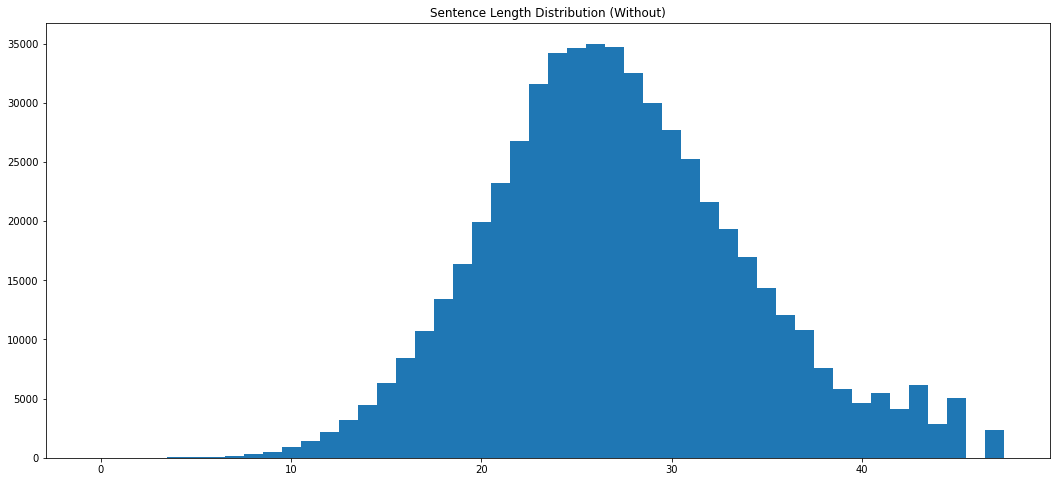

In [13]:
min_len = 999
max_len = 0
sum_len = 0

raw = df_without['뉴스제목'].tolist()

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("최단: ", min_len)
print("최장: ", max_len)
print("평균: ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

print(sentence_length.shape)

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution (Without)")

In [14]:

without_head = [x for x in df_without['뉴스제목'] if type(x) is str]

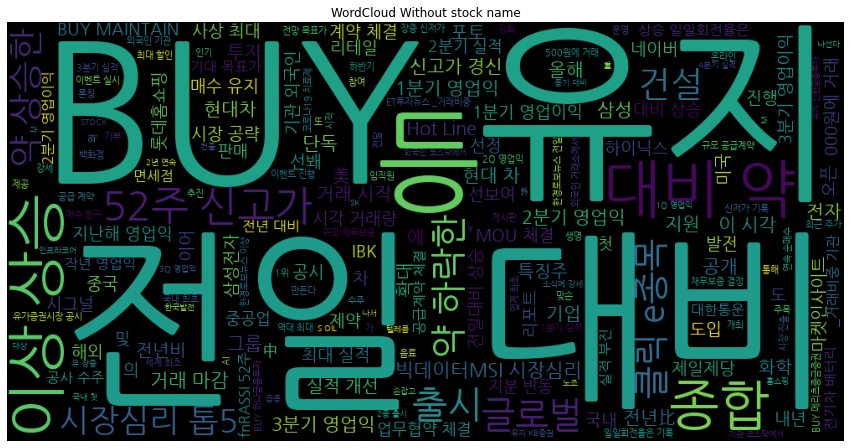

In [15]:
wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(without_head))
plt.figure(figsize=(15,10))
plt.title("WordCloud Without stock name")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now really want to see what I can do with the data.

<AxesSubplot:>

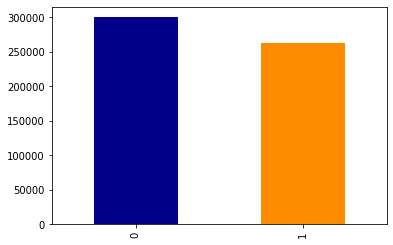

In [16]:
df_without['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [19]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")

df_without.to_csv('./without_name/EDA_headlines_no_scale.tsv', index=False, encoding='utf-8', sep="\t")


In [82]:
df_without.head()

,뉴스제목,주가변동,str_len
0,"24, 와인 경쟁력 강화로 가맹점 매출 높인다",0,25
1,"ENM, 1분기 매출 8108억원, 영업이익 397억원",0,31
2,"최신원 회장, '다락휴'로 호텔사업 키운다",0,24
3,", 게임박스에 인디게임 3종 출시…토종 생태계 키운다",0,29
4,"신한금투 ""현대·차 1분기 영업익 기대치 밑돌 듯""",1,28


In [83]:
df_without['뉴스제목'] = df_without['뉴스제목'].str.replace('\s+', ' ', regex=True)
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('[,.!·,…*>@#&$<_?.:\“\/\”\’\'\"\^\\‘\|\`\(\)\[\]\{\}]', '', x))
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('\u200c', '', x))
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('[-–ㆍ]', ' ', x))

In [88]:
df_without.sample(30)

,뉴스제목,주가변동,str_len
574235,스카이라이프 전국에 EBS 라이브특강 방송 송출,1,27
442191,허태수 회장 포스트 코로나 시대 대비해 업무 방식조직 문화 바꿔라,0,40
93718,김장할인 행사 돌입배추 시중가 50% 수준,1,27
429651,브라질 제약사와 지속형 인성장호르몬 공동개발기술이전 계약체결,0,36
443588,삼성SK 차세대배터리 맞손 1000억 규모 펀드 조성,0,33
324869,저칼로리 컵누들 쌀국수,0,16
493987,하나금투 마카오 외 복합리조트 성장 지속,0,26
481288,건설가전시장 둔화에 영업익 275%↓종합,1,28
351597,GC셀 3Q 누적 매출 267억전년比 37%↑,1,27
332177,2Q도 실적 먹구름목표주가↓ 현대차,0,22


In [89]:
df_without['str_len']= df_without['뉴스제목'].str.len()
df_without.loc[(df_without['str_len'] < 10)]

,뉴스제목,주가변동,str_len
51,검찰 압수수색 왜,0,9
203,인사,0,3
340,조합원 거리로,0,8
348,강국현 신임 사장,0,9
569,감사본부 신설,0,8
...,...,...,...
609131,5GX 상용화,1,8
609189,검찰 고발과징금,0,9
609303,희망공부방,1,6
610091,공매도 몸살,0,7


In [97]:
df_without['okt'] = df_without.apply(lambda row: t.morphs(row['뉴스제목']), axis=1)

df_without.head()

,뉴스제목,주가변동,str_len,okt
0,24 와인 경쟁력 강화로 가맹점 매출 높인다,0,24,"[24, 와인, 경쟁력, 강화, 로, 가맹, 점, 매출, 높인다]"
1,ENM 1분기 매출 8108억원 영업이익 397억원,0,29,"[ENM, 1분, 기, 매출, 8108억원, 영업, 이익, 397억원]"
2,최신원 회장 다락휴로 호텔사업 키운다,0,20,"[최신원, 회장, 다락, 휴, 로, 호텔, 사업, 키운다]"
3,게임박스에 인디게임 3종 출시토종 생태계 키운다,0,27,"[게임, 박스, 에, 인디, 게임, 3, 종, 출시, 토종, 생태계, 키운다]"
4,신한금투 현대차 1분기 영업익 기대치 밑돌 듯,1,25,"[신, 한, 금투, 현대차, 1분, 기, 영업, 익, 기, 대치, 밑돌, 듯]"


In [98]:
without_up = df_without[df_without['주가변동'] == 1]
without_down = df_without[df_without['주가변동'] == 0]

In [99]:
tokens_up = without_up.뉴스제목.values.tolist()
title_text = ''
for each_line in tokens_up:
    title_text = title_text + each_line + '\n'

tokens_up = t.morphs(title_text)
up = nltk.Text(tokens_up)
print("토큰 전체 개수: ", len(up.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(up.tokens)))     # 토큰 unique 개수

토큰 전체 개수:  2713155
토큰 unique 개수:  59818


In [100]:
tokens_down = without_down.뉴스제목.values.tolist()
title_text = ''
for each_line in tokens_down:
    title_text = title_text + each_line + '\n'

tokens_down = t.morphs(title_text)
down = nltk.Text(tokens_down)
print("토큰 전체 개수: ", len(down.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(down.tokens)))     # 토큰 unique 개수

토큰 전체 개수:  3095386
토큰 unique 개수:  63356


In [101]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

up_only, down_only = returnNotMatches(tokens_up, tokens_down)
len(up_only), len(down_only)

(34625, 43804)

In [102]:
# Save pickle
with open('./without_name/without_len_okt.pkl', 'wb') as f:
    pickle.dump(df_without, f)
with open('./without_name/without_up_only.pkl', 'wb') as f:
    pickle.dump(up_only, f)
with open('./without_name/without_down_only.pkl', 'wb') as f:
    pickle.dump(down_only, f)

In [ ]:
# Load pickle
with open('./without_name/without_len_okt.pkl', 'rb') as f:
    df_without = pickle.load(f)
with open('./without_name/without_up_only.pkl', 'rb') as f:
    up_only = pickle.load(f)
with open('./without_name/without_down_only.pkl', 'rb') as f:
    down_only = pickle.load(f)

In [105]:
stop_words = ['\u200c','\n ','\n',"'",'…',',','[',']','(',')','"','주','에','·','장','-','적',\
              '도','‘','`','가','’','의','이','★','은','“','대','”','한','B','로',\
              '?','3','선','A','는','5','!','"…','상','들','1','제','2','…"','20','일','서','명',"'…",'기',\
              '···','10','소','등','자','전','률','미','...','50','세','시','안','폭',"…'",'만','9',\
              '눈','더','e','량','고','인','52','성','1%','다','감','을','지','4','수','7','것','째',\
              '기','···','중','계','왜','총','내','과','젠','또','연','엔','차','할','8','.',\
              '새','사','때','..','임','속','’…','G','나','개','원',\
             '달','→','권','?…','간','배','30','K','저','와','하','/','1조','6','두','분','형',\
             '황','공','&','보','문','익','X','1억',']"','치','산','를','오','해','S','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','구','진','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','번','텍','팜','Q','메','2년','점','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','요',\
             "',",'스','…`','단','16','길','12','3억','회','호','용','2조','듯','최']

up_only = [each_word for each_word in up_only if each_word not in stop_words]
up = nltk.Text(up_only)

print(up.vocab().most_common(200))

down_only = [each_word for each_word in down_only if each_word not in stop_words]
down = nltk.Text(down_only)

print(down.vocab().most_common(200))

[('페시', 37), ('행정조사', 34), ('빈민가', 31), ('우륵', 30), ('다이나믹스', 26), ('보쌈김치', 24), ('피나', 23), ('그랜버드', 23), ('할리데이비슨', 23), ('스피릿', 22), ('571억원', 22), ('코윈', 21), ('7400억원', 21), ('유연석', 20), ('졸레어', 19), ('임대규', 19), ('부르켓', 19), ('웨하스', 19), ('카페리선', 18), ('영계', 18), ('생생우동', 18), ('외상', 18), ('CPhI', 18), ('동파', 18), ('보헴', 17), ('빌스', 17), ('프로게임단', 17), ('배기은', 16), ('UX', 16), ('서성환', 16), ('개비', 16), ('972억', 16), ('5700억원', 16), ('비니', 16), ('Powered', 15), ('정인호', 15), ('루카', 15), ('원빈', 15), ('2035', 15), ('민공', 15), ('왕건', 14), ('남원', 14), ('1155', 14), ('3271억', 14), ('티프', 14), ('사이드바', 14), ('향남', 14), ('쇼콜라', 14), ('브플먼트', 14), ('키썸', 14), ('EOA', 14), ('키우', 14), ('리비아', 14), ('CVVD', 14), ('이채', 14), ('콩국수', 14), ('카프로', 13), ('최윤', 13), ('MCNS', 13), ('쿠키앤크림', 13), ('과테말라', 13), ('KBR', 13), ('410억원', 13), ('오스프리', 13), ('미쯔', 13), ('923억원', 13), ('실상', 13), ('294', 13), ('정병국', 13), ('NPU', 13), ('스택', 13), ('겟트', 13), ('함부르크', 13), ('바르샤바', 13), ('5707', 13), ('주심',

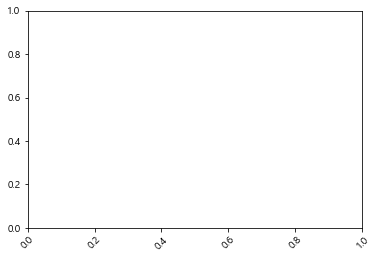

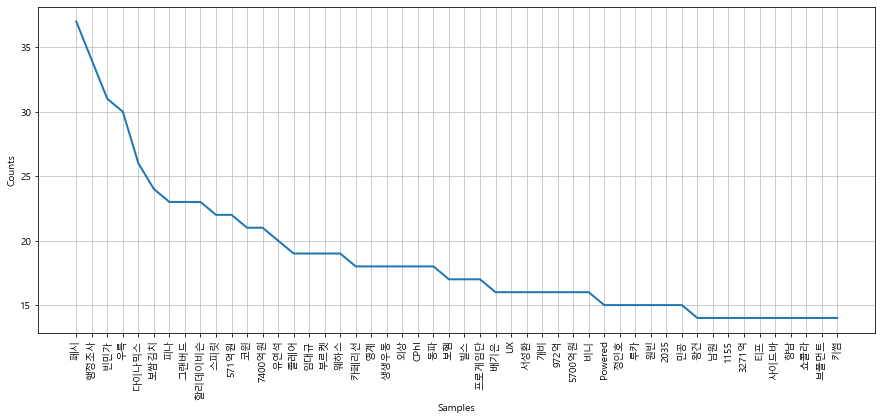

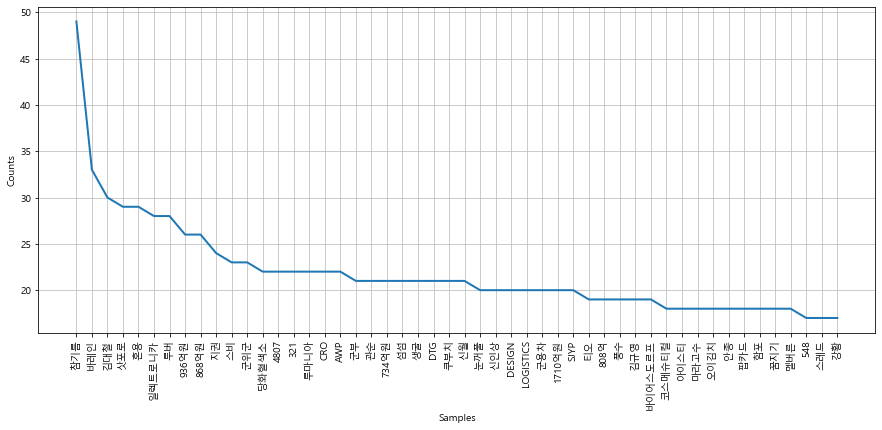

In [112]:
# 그래프에서 한글 폰트가 깨질 경우 실행
up = nltk.Text(up_only)
down = nltk.Text(down_only)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
up.plot(50)
plt.figure(figsize=(15,6))
down.plot(50)
plt.show()